In [139]:
import pandas as pd
import numpy as np

# saving data in our dataset as pandas dataframe
spotify_raw_df = pd.read_csv('./spotify_dataset.csv')
spotify_raw_df = spotify_raw_df.dropna()

for col in spotify_raw_df.columns:
    # check if the columns contains string data
    if pd.api.types.is_string_dtype(spotify_raw_df[col]):
        spotify_raw_df[col] = spotify_raw_df[col].str.strip()
spotify_raw_df = spotify_raw_df.replace({"":np.nan})



In [140]:


spotify_raw_df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']] = spotify_raw_df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']].astype(float)
spotify_raw_df[['Artist Followers', 'Popularity', 'Duration (ms)']] = spotify_raw_df[['Artist Followers', 'Popularity', 'Duration (ms)']].apply(pd.to_numeric)
spotify_raw_df['Streams'] = spotify_raw_df['Streams'].str.replace(',', '').apply(pd.to_numeric)

In [141]:
spotify_raw_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [142]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Configurazione dello stile

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (17, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


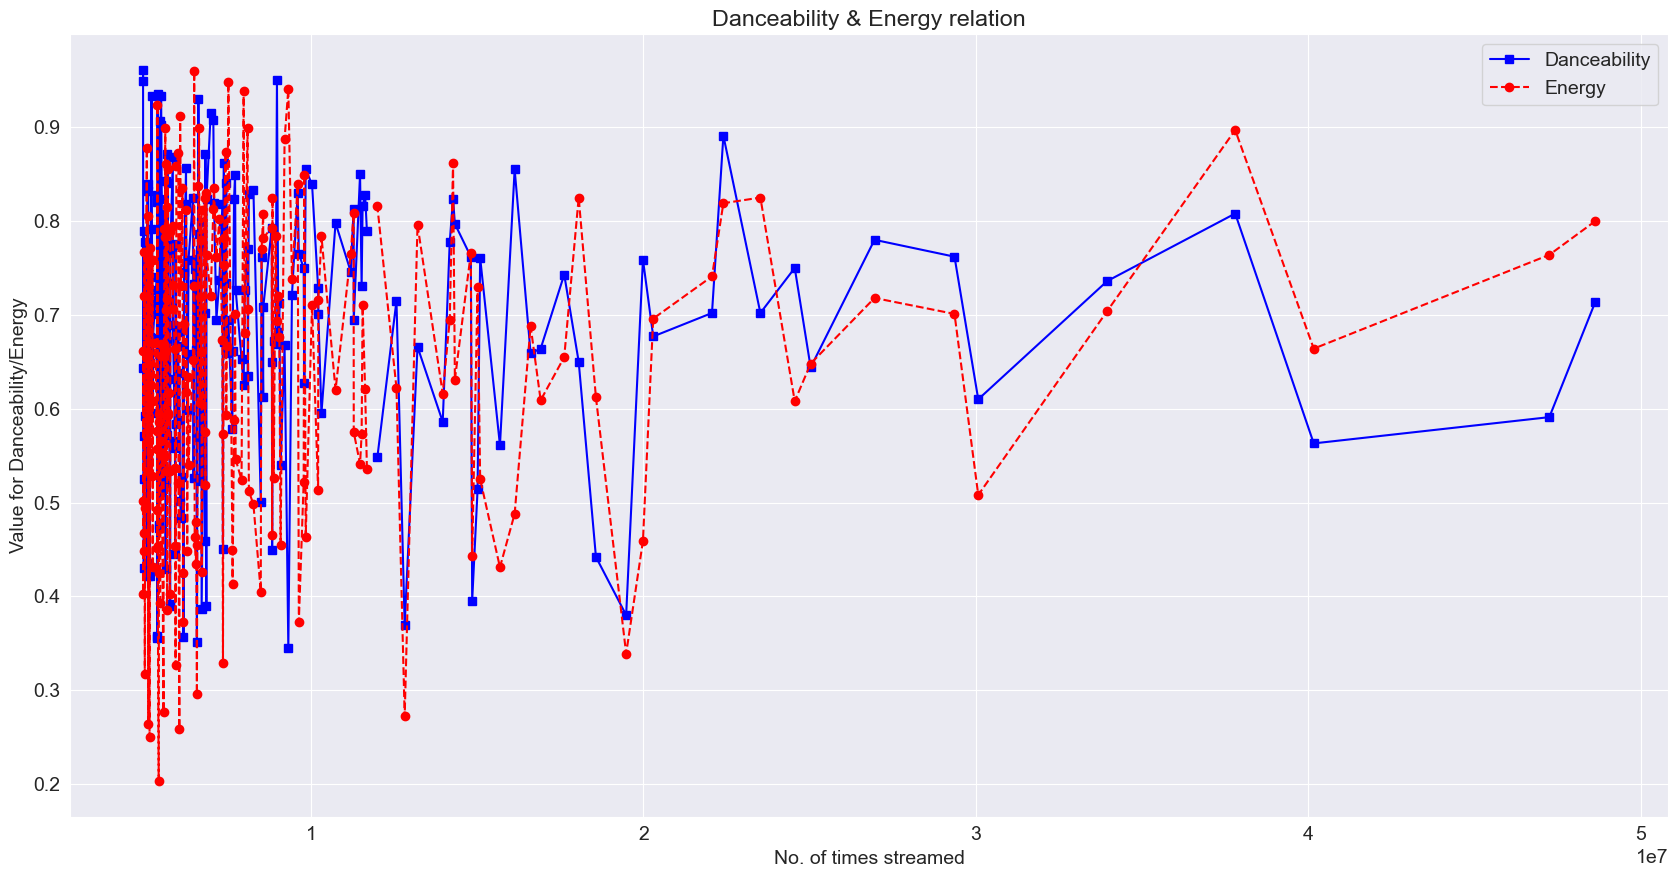

In [143]:
spotify_top_200 = spotify_raw_df.head(200)

plt.plot(spotify_top_200.Streams, spotify_top_200.Danceability, 's-b')
plt.plot(spotify_top_200.Streams, spotify_top_200.Energy, 'o--r')

plt.xlabel('No. of times streamed')
plt.ylabel('Value for Danceability/Energy')
plt.title("Danceability & Energy relation")
plt.legend(['Danceability', 'Energy'])

plt.tight_layout()
plt.savefig('danceability_energy_relation_plot.png', dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()

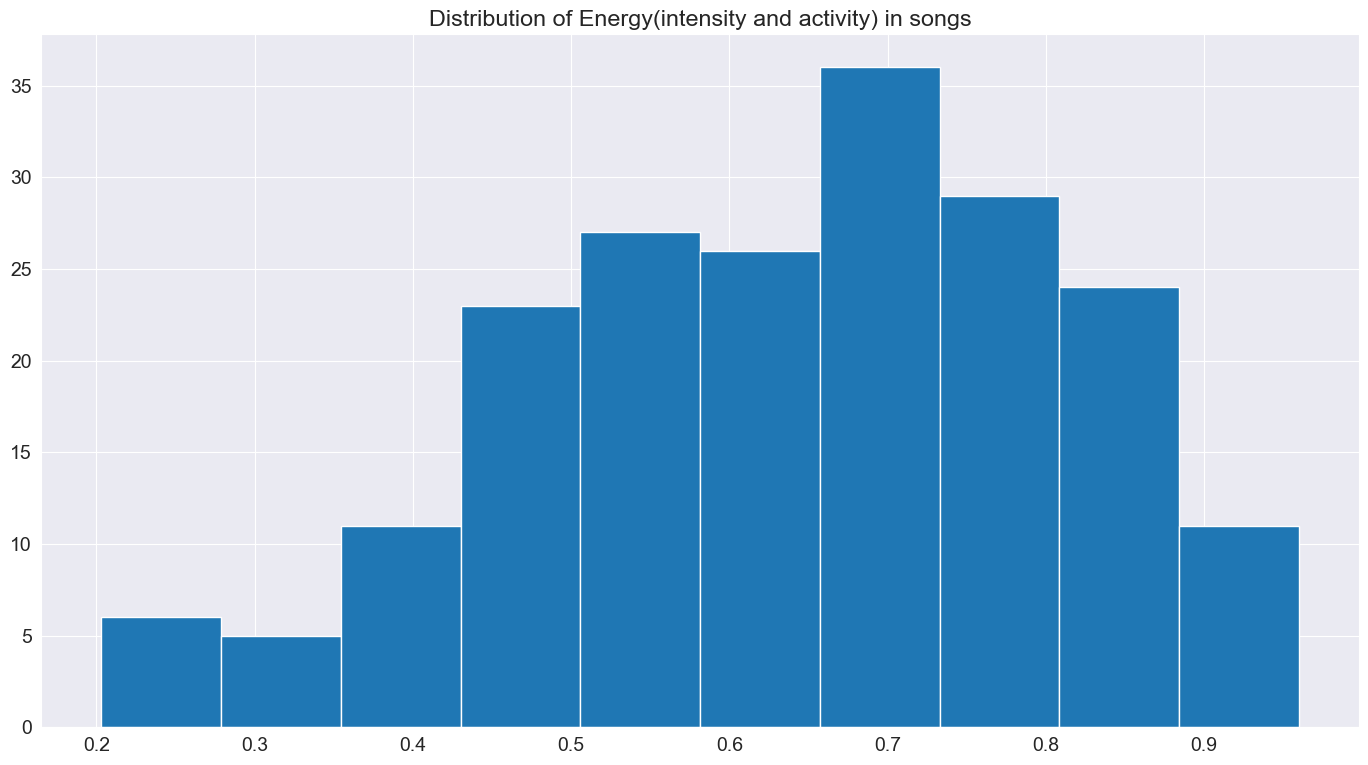

In [144]:
plt.title("Distribution of Energy(intensity and activity) in songs")
plt.hist(spotify_top_200.Energy)

plt.savefig('energy_distribution_plot.png', dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()

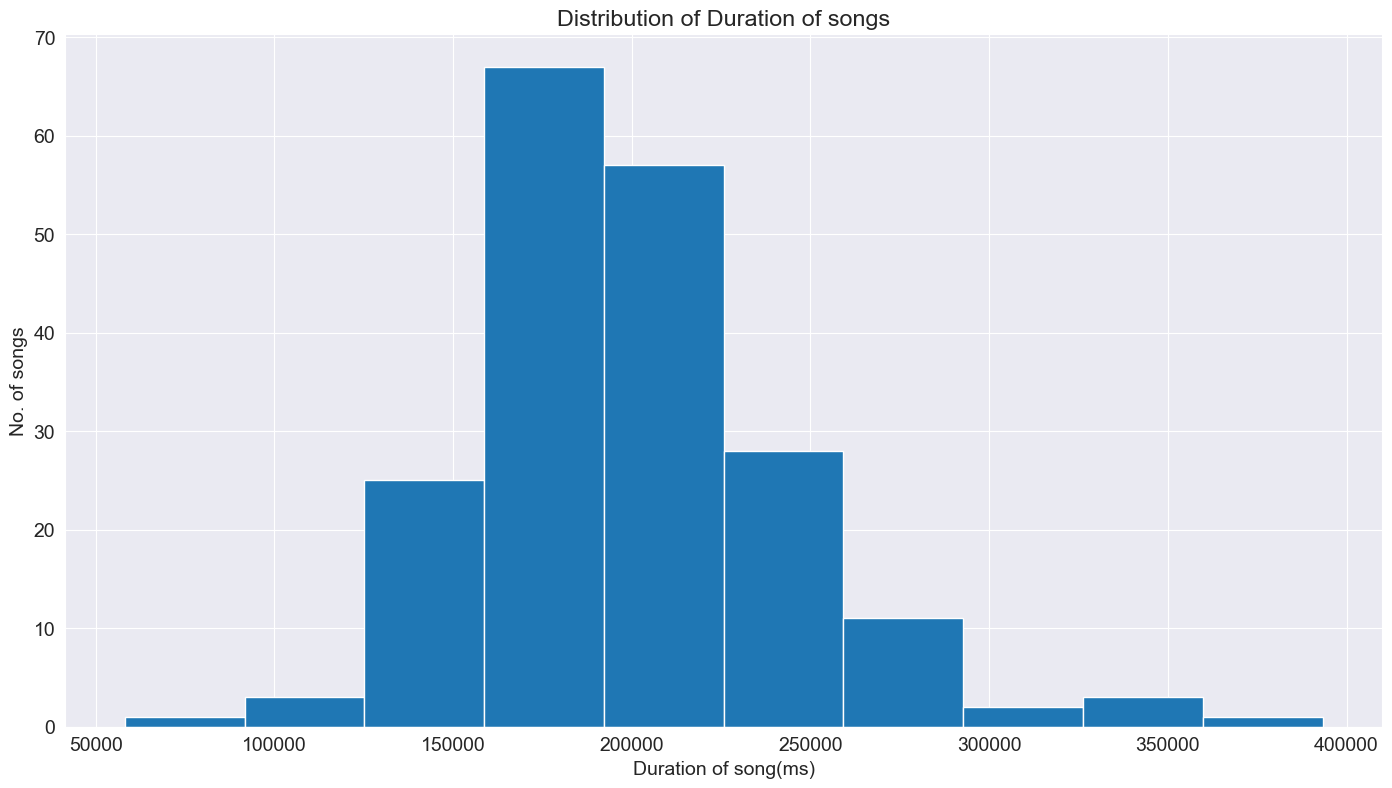

In [145]:
plt.hist(spotify_top_200["Duration (ms)"])

plt.xlabel("Duration of song(ms)")
plt.ylabel("No. of songs")
plt.title("Distribution of Duration of songs")

plt.savefig('duration_distribution_plot.png', dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()